In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
df = pd.read_csv('heart_cleveland_upload.csv')

In [5]:
# Resumen estadístico de las variables numéricas
print(df.describe())

# Comprobar valores nulos
print(df.isnull().sum())

# Visualizar la distribución de la variable objetivo
#sns.countplot(x='condition', data=df)
#plt.title("Distribución de la Presencia de Enfermedad Cardíaca")
#plt.show()

# Revisar la distribución de clases
print(df['condition'].value_counts())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [7]:
# Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop('condition', axis=1)
y = df['condition']

In [9]:
# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [15]:
# Normalización de las variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Definir el modelo de regresión logística
logreg_model = LogisticRegression(random_state=42)

In [19]:
# Entrenar modelo
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
# Predicciones
y_pred = logreg_model.predict(X_test)

Regresión Logística:
Precisión: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.77      0.88      0.82        42

    accuracy                           0.82        90
   macro avg       0.83      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90



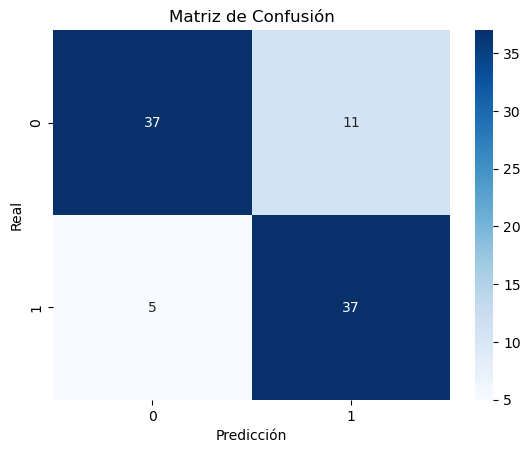

In [27]:
# Calcular métricas
print("Regresión Logística:")
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [29]:
# Generar curva ROC y calcular AUC
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

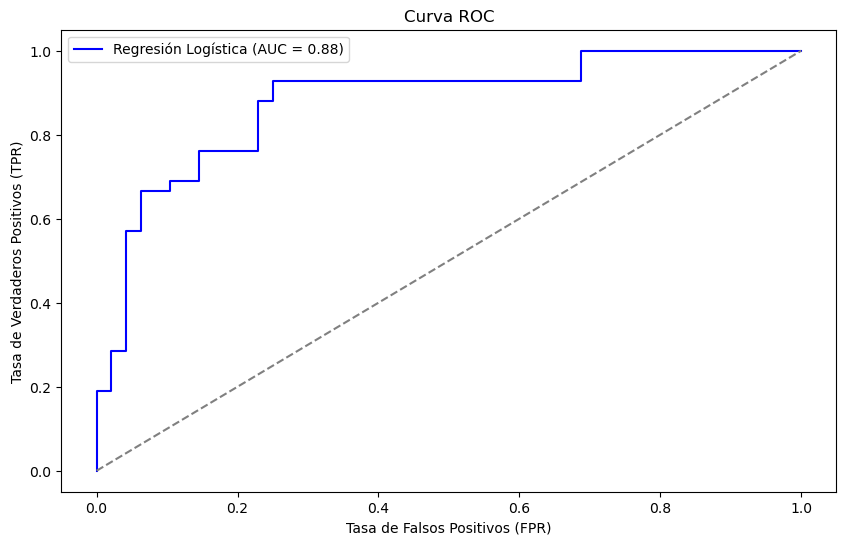

In [31]:
# Graficar Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Regresión Logística (AUC = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()